## SI 670 Applied Machine Learning, Homework 10: CNNs and Stochastic Gradient Dsecent (Due 11/30 11:59pm)

For this homework, we will be building a Convolution Neural Network to classify the images in the [CIFAR10 dataset](https://keras.io/api/datasets/cifar10/). Let's start by setting up the data.

In [1]:
from keras.datasets import cifar10


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32')/ 255


170498071/170498071 [==============================] - 15s 0us/step


### Question 1 (15 points)

Conver the train and test labels to categorical variables using the `to_categorical` function

In [2]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Question 2 (15 points)

Let's set up our network now. Add the following layers to the network:

1) A `Conv2D` layer with `filters` = 32, `kernel_size` = (4, 4), `input_shape` = (32, 32, 3), and the "relu" activation function
2) A `MaxPooling2D` layer `pool_size` = (2, 2)
3) A `Conv2D` layer with `filters` = 32, `kernel_size` = (4, 4), and the "relu" activation function
4) A `MaxPooling2D` layer `pool_size` = (2, 2)
5)  A `Conv2D` layer with `filters` = 128, `kernel_size` = (4, 4), and the "relu" activation function

In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (4, 4), activation='relu'))

Let's display the architecture of our convnet so far:

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         65664     
                                                                 
Total params: 83,648
Trainable params: 83,648
Non-traina

### Question 3 (15 points)

Now, it's time to add the `flatten` and `Dense` layers.

Add:
1) The flatten layer
2) A `Dense` layer with `units` = 128 and the "relu" activation function
3) The final `Dense` layer with `units` = the number of classes in the dataset, and the "softmax" activation function

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Now here's what our network 
looks like:

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 128)         65664     
                                                                 
 flatten (Flatten)           (None, 512)               0

### Question 4 (15 points)

Let's compile the model and fit the data

1) Complie the model with `optimizer` = 'adam', `loss` = 'categorical_crossentropy', and 'accuracy' as the metric
2) Fit the model with `epochs` = 20, and `batch_size` = 64

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=20, batch_size=64)

Epoch 1/20
782/782 [==============================] - 15s 18ms/step - loss: 1.6030 - accuracy: 0.4108
Epoch 2/20
782/782 [==============================] - 14s 18ms/step - loss: 1.2665 - accuracy: 0.5455
Epoch 3/20
782/782 [==============================] - 14s 18ms/step - loss: 1.1182 - accuracy: 0.6044
Epoch 4/20
782/782 [==============================] - 14s 18ms/step - loss: 1.0244 - accuracy: 0.6383
Epoch 5/20
782/782 [==============================] - 14s 18ms/step - loss: 0.9540 - accuracy: 0.6646
Epoch 6/20
782/782 [==============================] - 14s 18ms/step - loss: 0.8932 - accuracy: 0.6875
Epoch 7/20
782/782 [==============================] - 15s 19ms/step - loss: 0.8369 - accuracy: 0.7056
Epoch 8/20
782/782 [==============================] - 14s 18ms/step - loss: 0.7913 - accuracy: 0.7213
Epoch 9/20
782/782 [==============================] - 14s 17ms/step - loss: 0.7501 - accuracy: 0.7356
Epoch 10/20
782/782 [==============================] - 14s 18ms/step - loss: 0.710

### Question 5 (15 points)

Finally, let's evaluate our model using the model.evaluate() function

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.1888 - accuracy: 0.6740


### Question 5 (25 points)

Identify the following points in the image below:

1) Local Minima
2) Global Minima
3) Local Maxima
4) Global Maxima

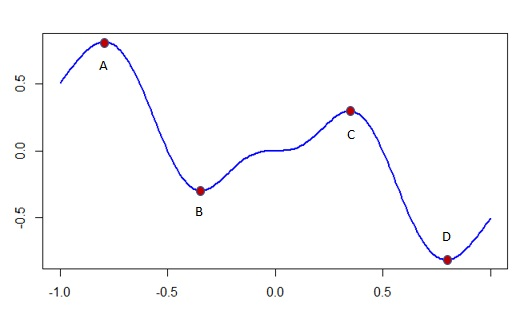


Add your answers here: 
* Local Minima: B,D
* Global Minima: D
* Local Maxima: A,C
* Global Maxima: A